# GRIP TASK-3 By Rajeswar Sharma
## Exploratory Data Analysis - Retail 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [94]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(10)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# Exploring the Dataset

In [3]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Data has no missing value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.drop(columns=['Postal Code','Country'],inplace=True,axis=1)

In [6]:
data.describe(include='all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


## Data consists of 7 Catagorical and 4 continuous variables
### Continuous Variables: 
#### 1.Sales
#### 2.Quantity	
#### 3.Discount	
#### 4.Profit

### Categorical Variable:
#### 1.Ship Mode	
#### 2.Segment	
#### 3.City	
#### 4.State	
#### 5.Region	
#### 6.Category	
#### 7.Sub-Category

# Data Analysis

## Checking Correltions among real valued attributes 

<AxesSubplot:>

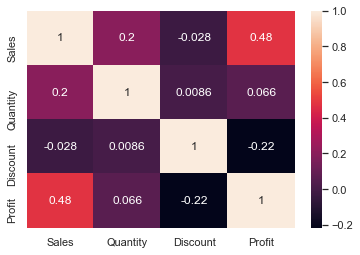

In [7]:
sns.heatmap(data.iloc[:,7:12].corr(),annot=True)

### Profit and Discount has negative correlation of -0.22, Hence, the Correlation is insignificant.
### Sale and Profit show positive correlation with coefficient of 0.48 

## Analyzing Shiping mode

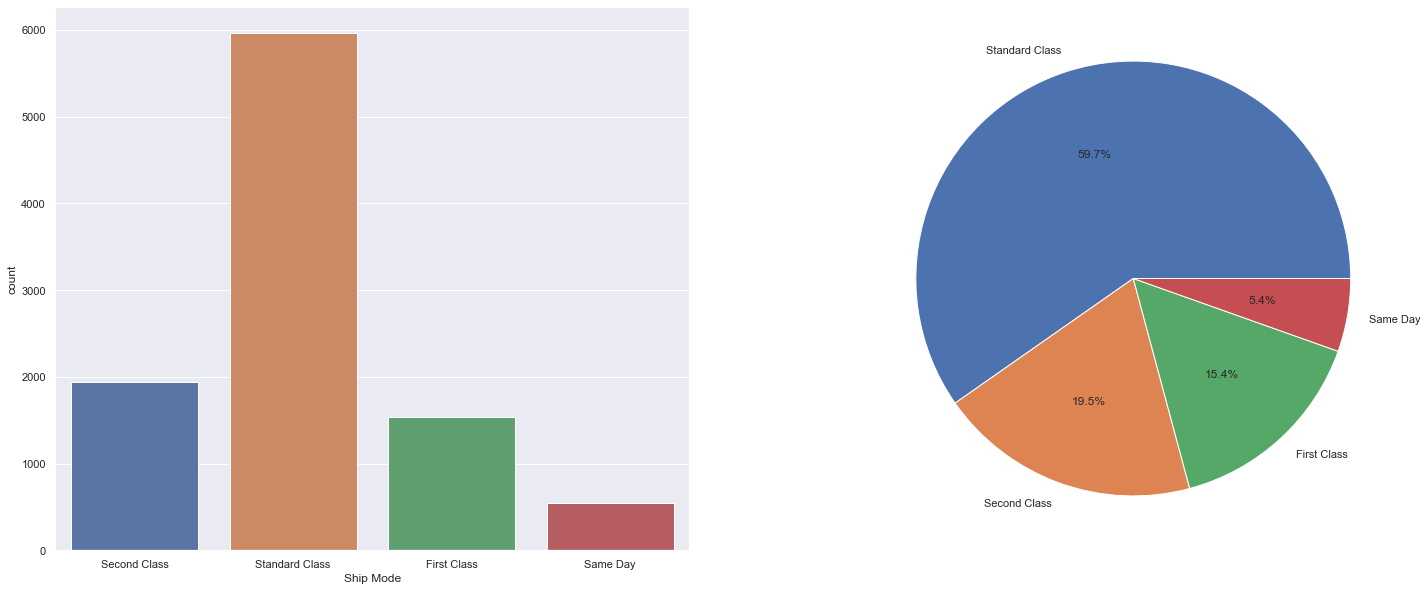

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.countplot(x=data['Ship Mode'],ax=axes[0])
plt.axes = axes[1]
plt.pie(x=data['Ship Mode'].value_counts(),
        labels=data['Ship Mode'].value_counts().index, autopct='%1.1f%%')
plt.show()


In [9]:
from scipy.stats import stats
ship_mode = data['Ship Mode'].unique()
profit_ship_mode_0 = data['Profit'][data['Ship Mode'] == ship_mode[0]]
profit_ship_mode_1 = data['Profit'][data['Ship Mode'] == ship_mode[1]]
profit_ship_mode_2 = data['Profit'][data['Ship Mode'] == ship_mode[2]]
profit_ship_mode_3 = data['Profit'][data['Ship Mode'] == ship_mode[3]]
stats.f_oneway(profit_ship_mode_0, profit_ship_mode_1,
               profit_ship_mode_2, profit_ship_mode_3)


F_onewayResult(statistic=0.1539161591938946, pvalue=0.9272083739374918)

## From above Graphs and tests:
### 1. The most preferred mode of shipping is "Standard class", 59.7% of the shimpents are deliveredy through this mode.

### 2. Since the f value is : 0.15 and p-value is : 0.92 (i.e p > 0.05 ), it can be assumed that there is no significant difference in profit-means of each shipping methods. Hence, shipping methods does not play any significant roles in profit margin.

# Number of orders per Customer Segment 

<AxesSubplot:xlabel='Segment', ylabel='count'>

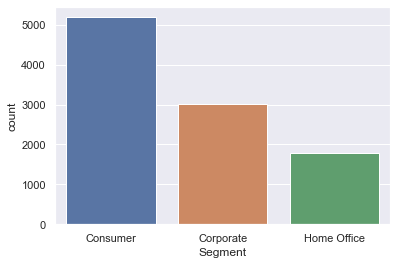

In [10]:
sns.countplot(x=data['Segment'])

### The most number of the orders are placed by "Consumer"-type segment.

# Number of categorized orders per Cuntomer segment 

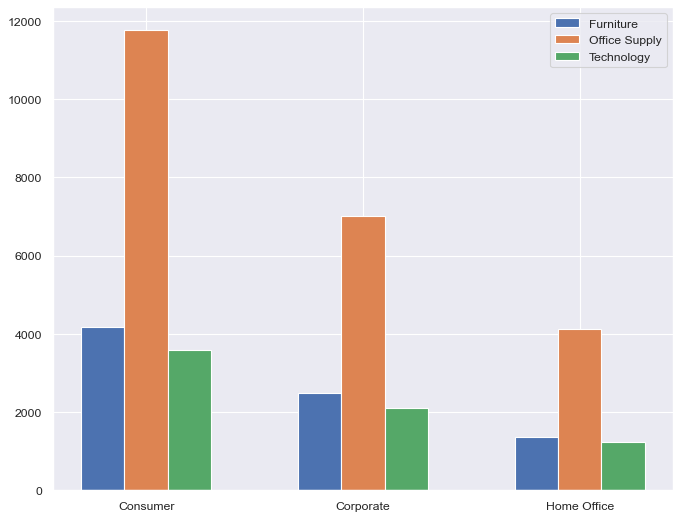

In [11]:
plt.figure(figsize=(10,8),dpi=80)
w = 0.2
x = ['Consumer','Corporate','Home Office']
furniture = data[data['Category'] == 'Furniture'].groupby('Segment').sum()['Quantity']
office_supply =data[data['Category'] == 'Office Supplies'].groupby('Segment').sum()['Quantity']
technology = data[data['Category'] == 'Technology'].groupby('Segment').sum()['Quantity']
office_supply
bar1 = np.arange(len(furniture))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
plt.bar(bar1,furniture,w,label='Furniture')
plt.bar(bar2,office_supply,w,label='Office Supply')
plt.bar(bar3,technology,w,label='Technology')
plt.xticks(bar2,x)
plt.legend()



### The products of type  "Office Supply" are the most sold ones in each of the cuntomer segment
### Where as products of category "Technology" are the less brought by the customers of all segments

<AxesSubplot:xlabel='Segment'>

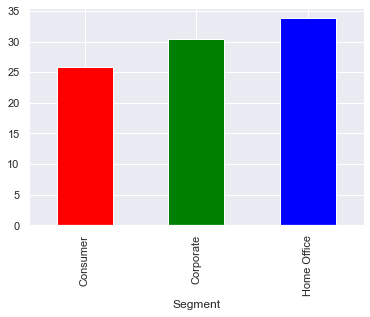

In [12]:
data.groupby('Segment').mean()['Profit'].plot.bar(color=['red','green','blue'])


### The Super store make maximum profit from the "Home office" segment.
### And least profit from the "Consumer" segment.

## Checking if the difference in mean profit in significant

In [13]:
segments = data['Segment'].unique()
profit_segment_0 = data['Profit'][data['Segment'] == segments[0]]
profit_segment_1 = data['Profit'][data['Segment'] == segments[1]]
profit_segment_2 = data['Profit'][data['Segment'] == segments[2]]
stats.f_oneway(profit_segment_0, profit_segment_1,
               profit_segment_2,)


F_onewayResult(statistic=0.8980668323003197, pvalue=0.4073892685202365)

### p>0.05, All the means belong to same population, Hence the difference in profit of each segment is not statistically significant.


# Number of sold products of each categories

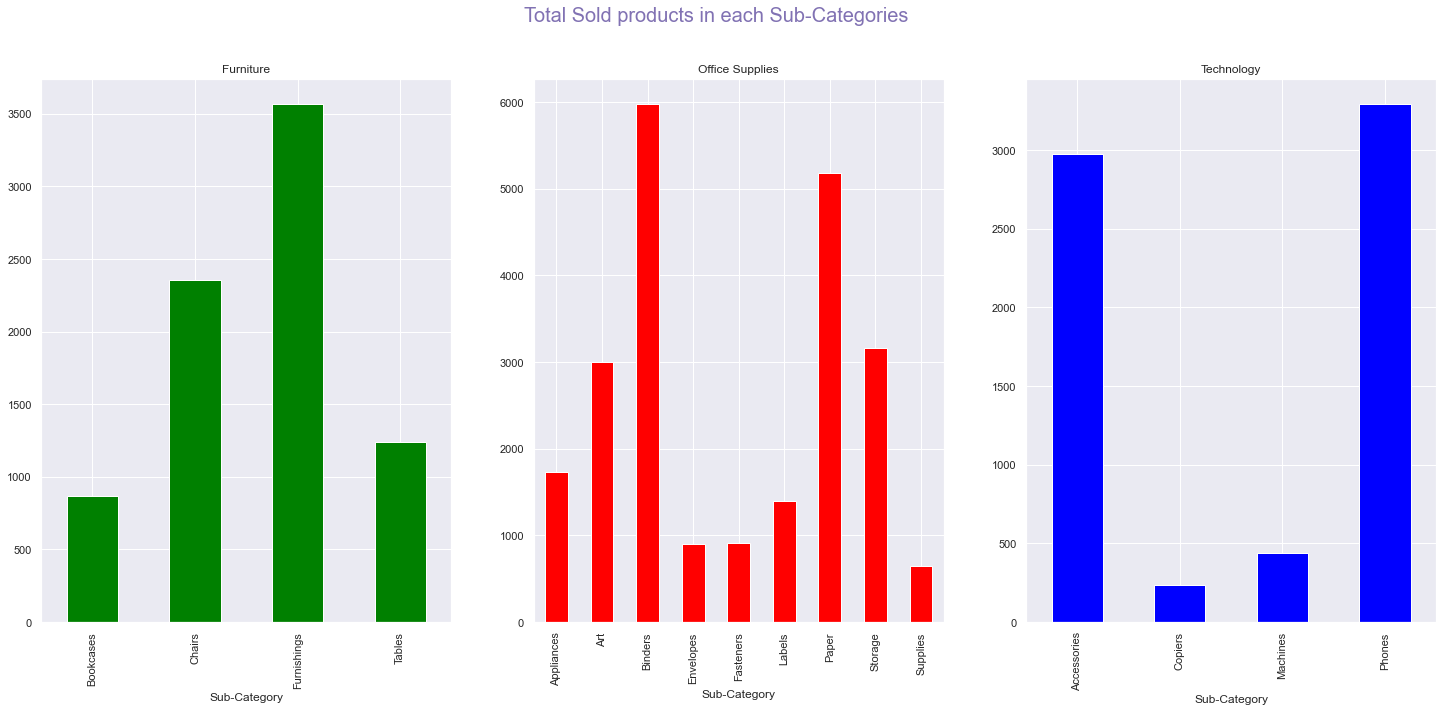

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10))
fig.suptitle("Total Sold products in each Sub-Categories",fontsize=20,color='m')
data[data['Category'] == 'Furniture'].groupby('Sub-Category')['Quantity'].sum().plot.bar(color='green',ax=axes[0],title='Furniture')
data[data['Category'] == 'Office Supplies'].groupby('Sub-Category')['Quantity'].sum().plot.bar(color='red',ax=axes[1],title='Office Supplies')
data[data['Category'] == 'Technology'].groupby('Sub-Category')['Quantity'].sum().plot.bar(color='blue',ax=axes[2],title='Technology')
plt.show()

## From the plot following things can be observed:
### 1. "Furnishings" are the most sold and "Bookcases" are the least sold sub category  in Furniture.
### 2. "Binder" are the most sold and "Supplies" are the least sold sub category  in Office Supplies.
### 2. "Phones" are the most sold and "Copies" are the least sold sub category  in Office Technoloy.

# Profit Earned in sub categories

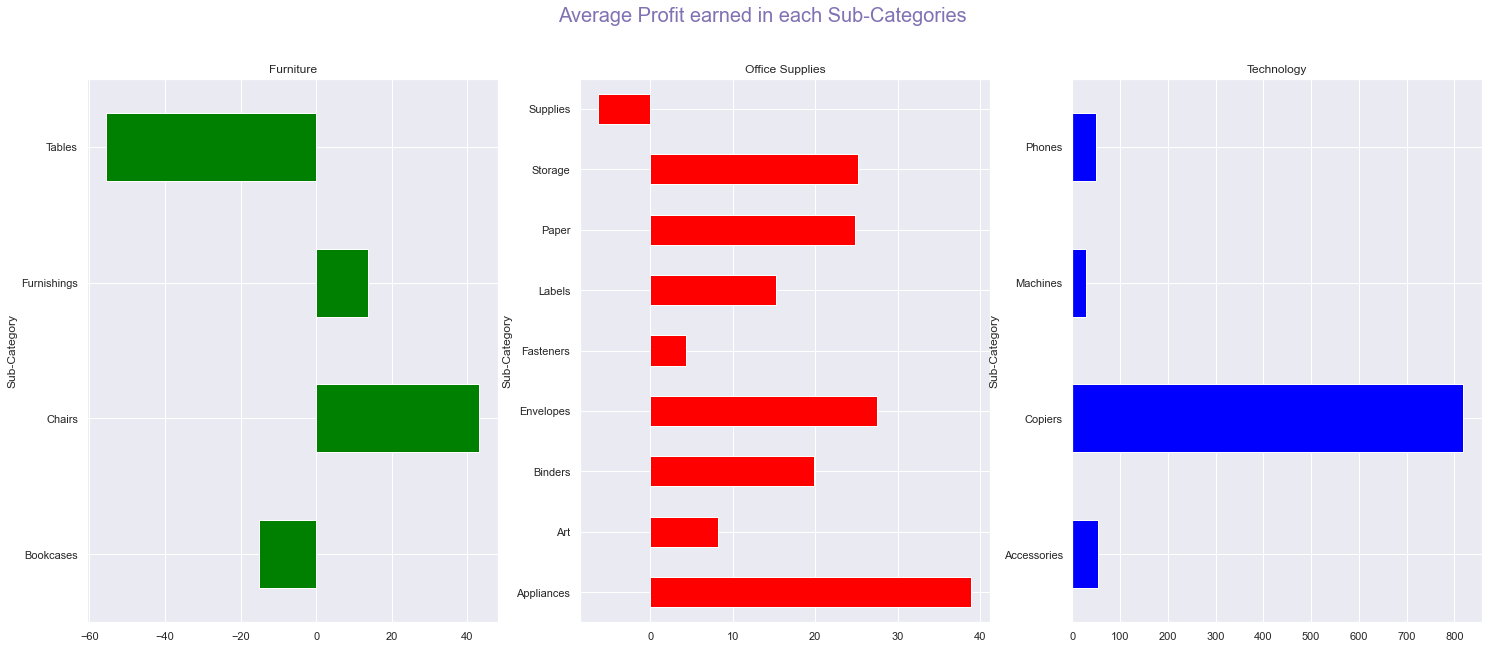

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10))
fig.suptitle("Average Profit earned in each Sub-Categories",fontsize=20,color='m')
data[data['Category'] == 'Furniture'].groupby('Sub-Category')['Profit'].mean().plot.barh(color='green',ax=axes[0],title='Furniture')
data[data['Category'] == 'Office Supplies'].groupby('Sub-Category')['Profit'].mean().plot.barh(color='red',ax=axes[1],title='Office Supplies')
data[data['Category'] == 'Technology'].groupby('Sub-Category')['Profit'].mean().plot.barh(color='blue',ax=axes[2],title='Technology')
plt.show()

### The Store is facing a significant loss on "Furniture : Tables", "Furniture : BookCases" and "Office Supplies : Supplies" 
### "Chairs","Appliences" and "Copiers" have the largest mean profit margin.

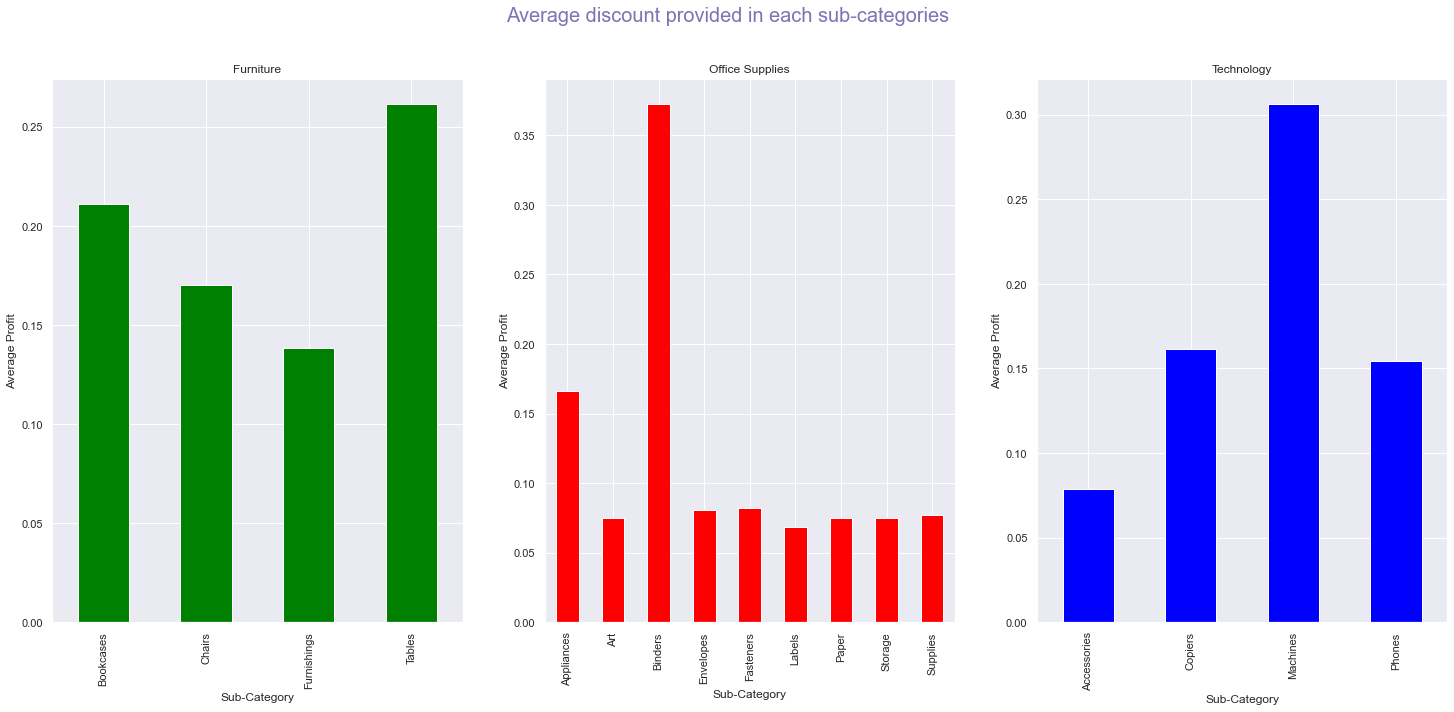

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10))
fig.suptitle("Average discount provided in each sub-categories",fontsize=20,color='m')
data[data['Category'] == 'Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar(color='green',ax=axes[0],title='Furniture',ylabel="Average Profit")
data[data['Category'] == 'Office Supplies'].groupby('Sub-Category')['Discount'].mean().plot.bar(color='red',ax=axes[1],title='Office Supplies',ylabel="Average Profit")
data[data['Category'] == 'Technology'].groupby('Sub-Category')['Discount'].mean().plot.bar(color='blue',ax=axes[2],title='Technology',ylabel="Average Profit")
plt.show()

### "Tables","Binders" and "Machines" have largest discount margin

In [96]:
print("Unique regions",data['Region'].unique().tolist())

Unique regions ['South', 'West', 'Central', 'East']


<AxesSubplot:xlabel='Region', ylabel='Average Profit'>

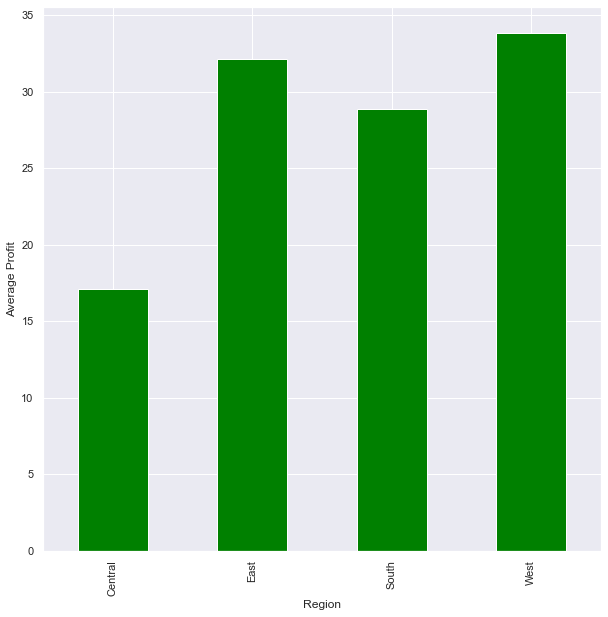

In [101]:
plt.figure(figsize=(10,10))
data.groupby('Region').mean()['Profit'].plot.bar(color='green',ylabel="Average Profit")


### West Region is most profitable zone for the super store.
### Where as Central region is less profitable for the store among all of the regions.

# Region-Wise Average Profit Analysis 

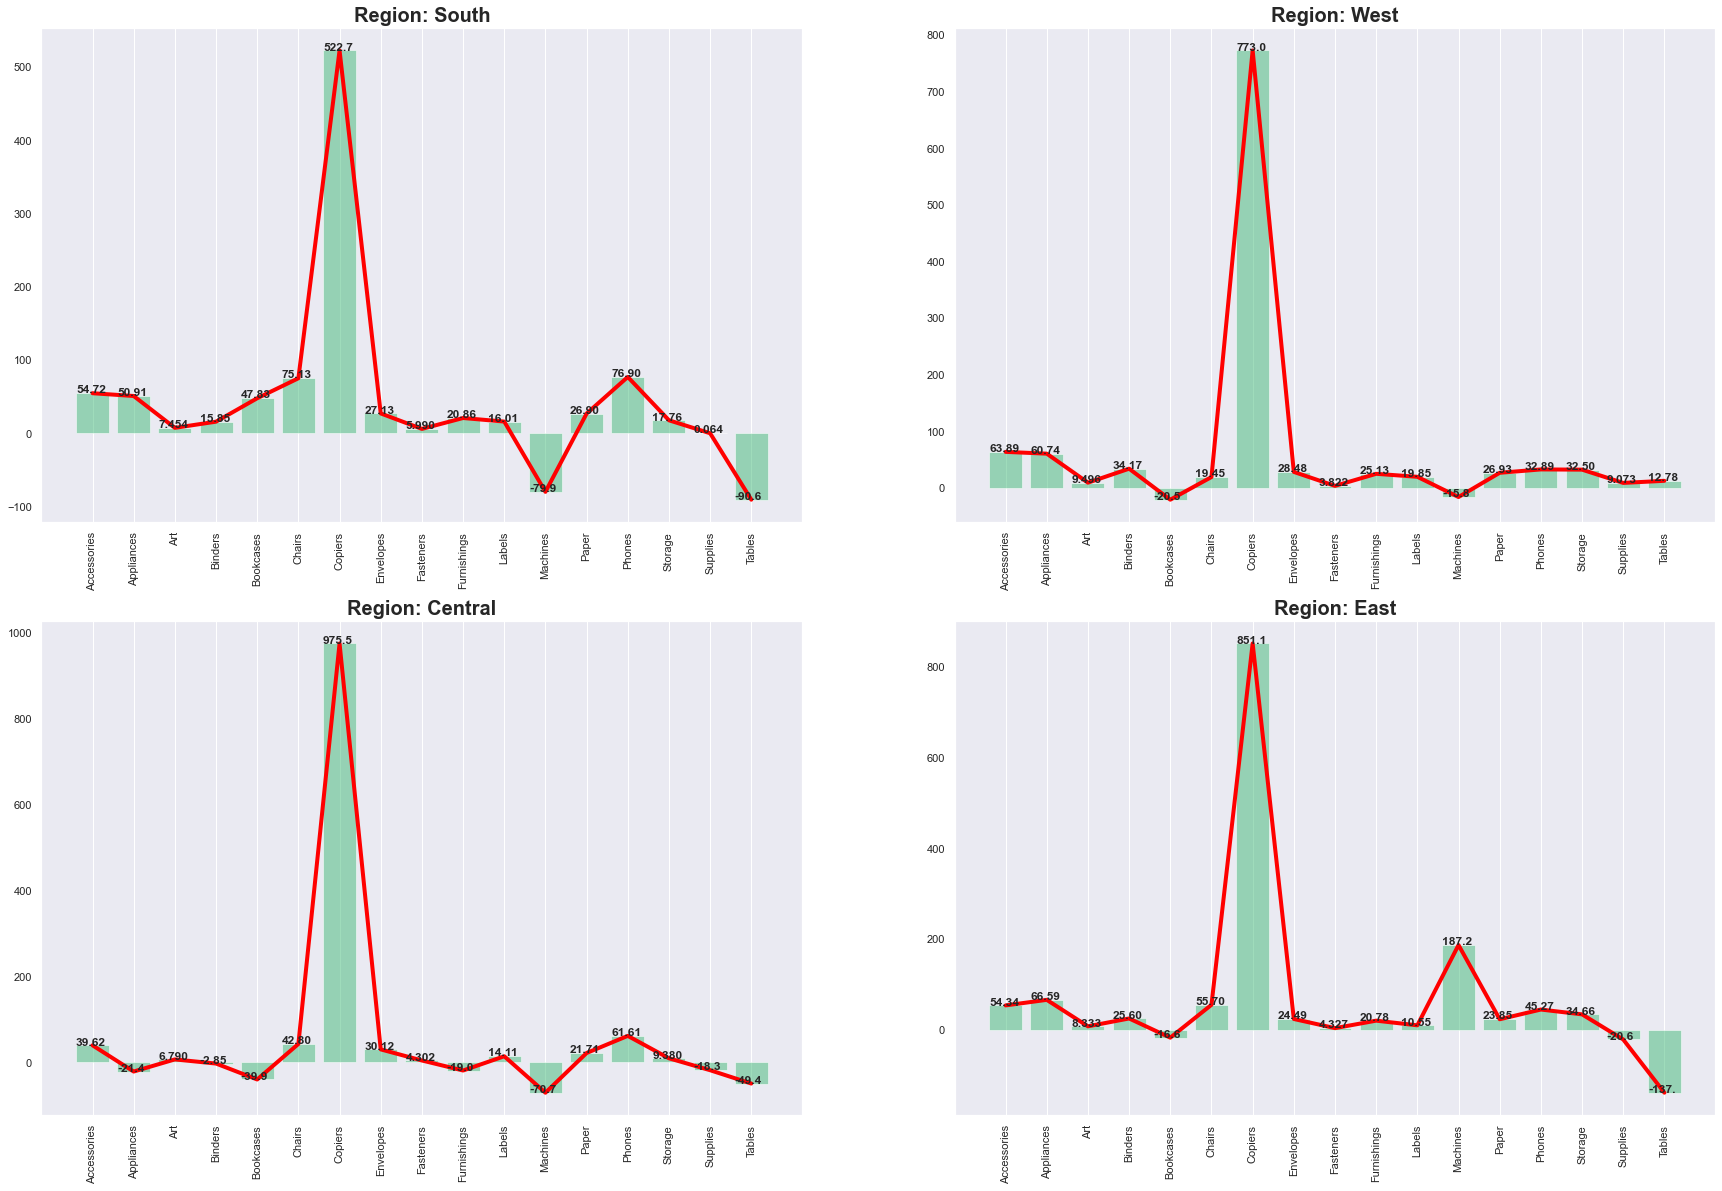

In [19]:
fig, axes = plt.subplots(2, 2,figsize=(30,20))

def plot_bar(region,ax_x,ax_y):
    plt.sca(axes[0, 0])
    axes[ax_x, ax_y].set_title("Region: "+region,fontweight='bold',fontsize=20)
    plt.title="Region:"+region
    d = data[data['Region'] == region].groupby('Sub-Category')['Profit'].mean()
    bar1 = np.arange(len(d))
    #plt.axes = 
    plt.sca(axes[ax_x, ax_y])
    plt.xticks(bar1, d.index,rotation='vertical')
    axes[ax_x,ax_y].bar(bar1, d, alpha=0.5, color='#41ba78')
    axes[ax_x, ax_y].plot(bar1, d, color='red', linewidth=4)

    axes[ax_x, ax_y].grid(
        color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    for index, value in enumerate(d):
        axes[ax_x, ax_y].text(index-0.4, value,
                str(value)[:5],fontweight='bold')

plot_bar('South',0,0)
plot_bar('West',0,1)
plot_bar('Central',1,0)
plot_bar('East',1,1)

plt.show()



### 1. The average profit earned by products of sub-catrgoty: "Copiers" is maximum in all regions.
### 2. Products of type "Table" is not profitable in any of the region except west.
### 3. Super Store have faced Minor loss on Products of type "Bookcase" in each regoins except south.
### 3. And products of type "Art","Supplies","Fasteners" and "Binders" retruns a minimum profit


# Discount V/s Profit Analysis

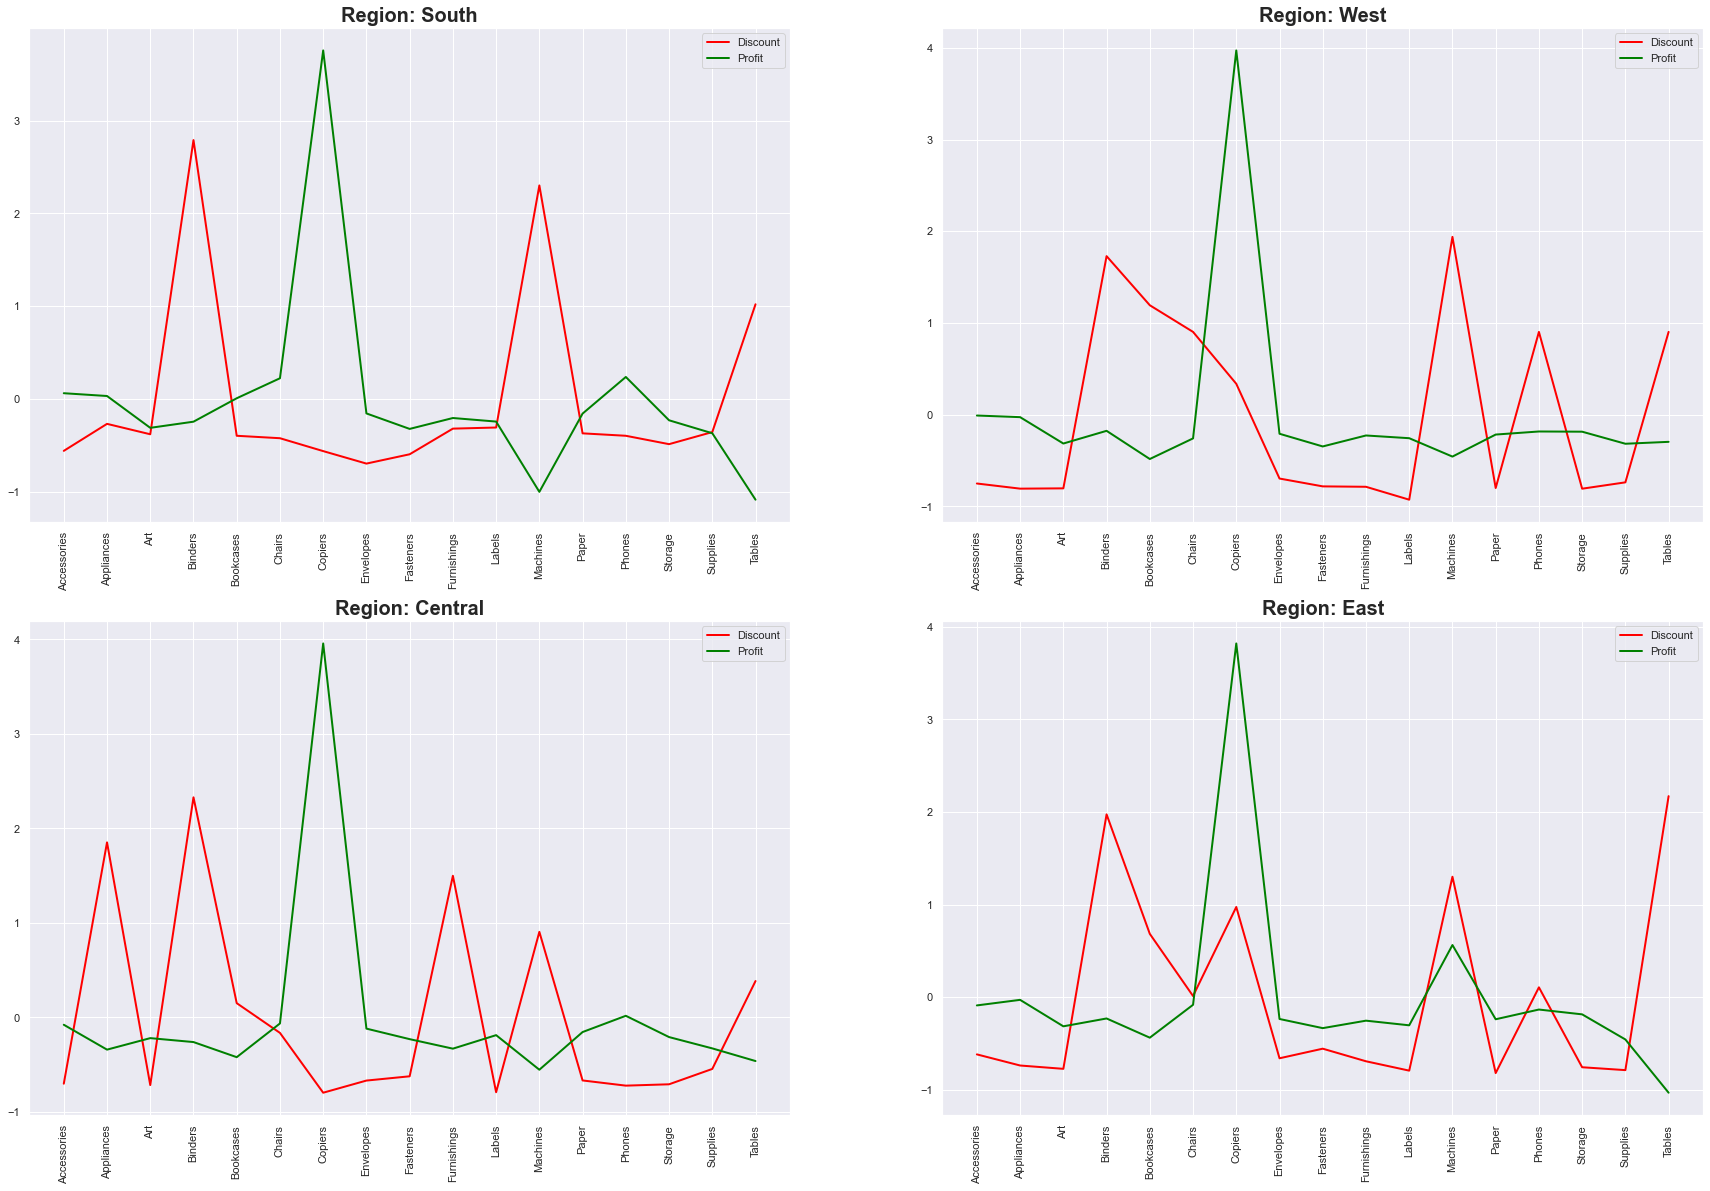

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fig, axes = plt.subplots(2, 2, figsize=(30, 20))


def plot_bar(region, ax_x, ax_y):
    plt.sca(axes[0, 0])
    axes[ax_x, ax_y].set_title(
        "Region: "+region, fontweight='bold', fontsize=20)
    plt.title = "Region:"+region
    d = data[data['Region'] == region].groupby('Sub-Category')['Discount'].mean()
    n_d = sc.fit_transform(d.values.reshape(-1, 1))
    n_d = n_d.reshape(1, 17)
    n_d = n_d[:][0]
    bar1 = np.arange(len(d))

    s = data[data['Region'] == region].groupby('Sub-Category')['Profit'].mean()
    n_s = sc.fit_transform(s.values.reshape(-1, 1))
    n_s = n_s.reshape(1, 17)
    n_s = n_s[:][0]
    
    
    #plt.axes =
    plt.sca(axes[ax_x, ax_y])
    plt.xticks(bar1, d.index, rotation='vertical')
    axes[ax_x, ax_y].plot(bar1, n_d, color='red', linewidth=2,label="Discount")
    axes[ax_x, ax_y].plot(bar1, n_s, color='green', linewidth=2,label="Profit")
    axes[ax_x, ax_y].legend()

plot_bar('South', 0, 0)
plot_bar('West', 0, 1)
plot_bar('Central', 1, 0)
plot_bar('East', 1, 1)

plt.show()


### In South region products of type "Machine" have a poor Discount to Profit ratio, Super store should either reduce the discount in this region or divert the supply of these products to Eastern region for this sub-category.
### In all over the regions Products of type "Copiers" have a great Discount and Profit Ratio.
### Products of type "Tables" are not performing well in any of the region, Even after having a large discount value

# State-wise Analysis

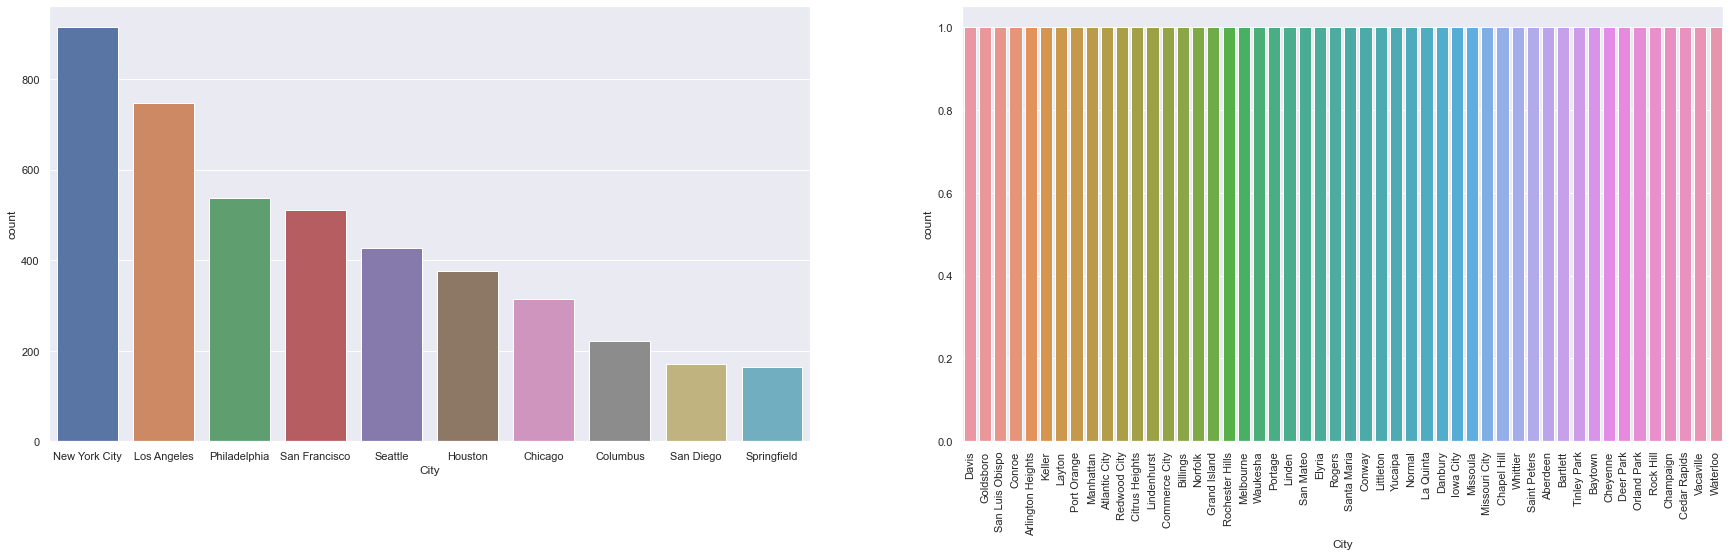

In [111]:
fig, axes = plt.subplots(1,2,figsize=(30,8))
sns.countplot(x=data['City'], order=(data['City'].value_counts().head(10)).index,ax= axes[0])
sns.countplot(x=data['City'], order=(data['City'].value_counts().tail(50)).index,ax= axes[1])
plt.xticks(rotation=90)
plt.show()

### 1. New York City has maximum numbers of orders

In [123]:
d = data['City'].value_counts()
min_orders = d[d.values<5].index.tolist()
len(d)

531

### There are 531 states, Where number of orders are less than 5

# State-wise Profit and loss analysis

<AxesSubplot:title={'center':'Average Profit Vs City'}, xlabel='State'>

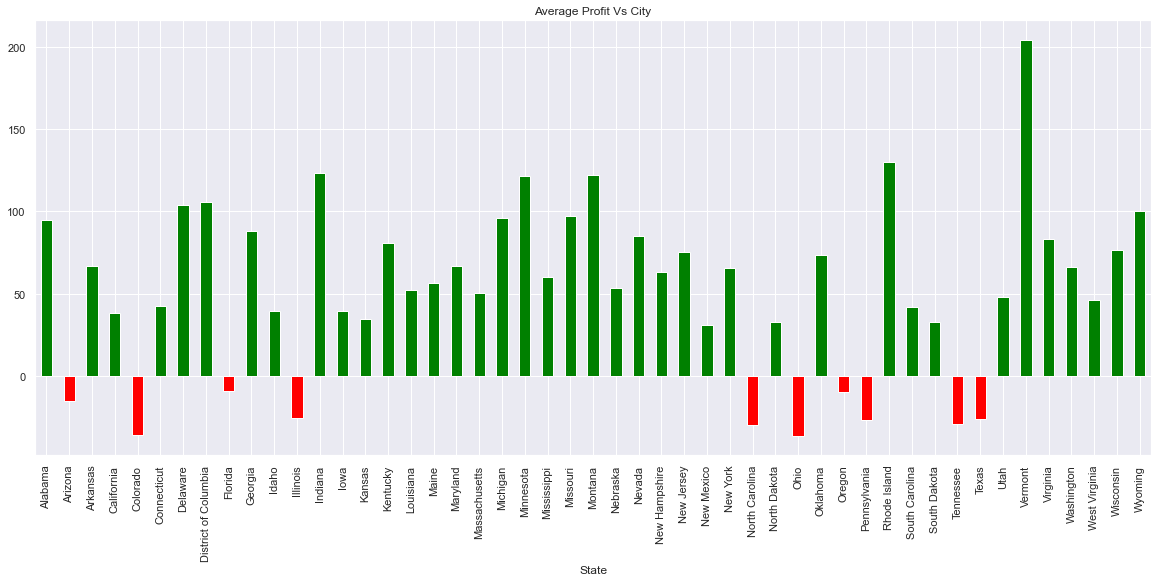

In [22]:
plt.figure(figsize=(20,8))
d = data.groupby('State').mean()['Profit']
c = d.map(lambda x : 'green' if(x>0) else 'red' )
d.plot.bar(color=c,title="Average Profit Vs City")

In [23]:
loss_city = d[d.values<0].index

### Super Store is facing loss in the following ctities
### Arizona, Colorado, Florida, Illinois, North Carolina, Ohio, Oregon, Pennsylvania, Tennessee , Texas.

# Analysis of non-profit-making states

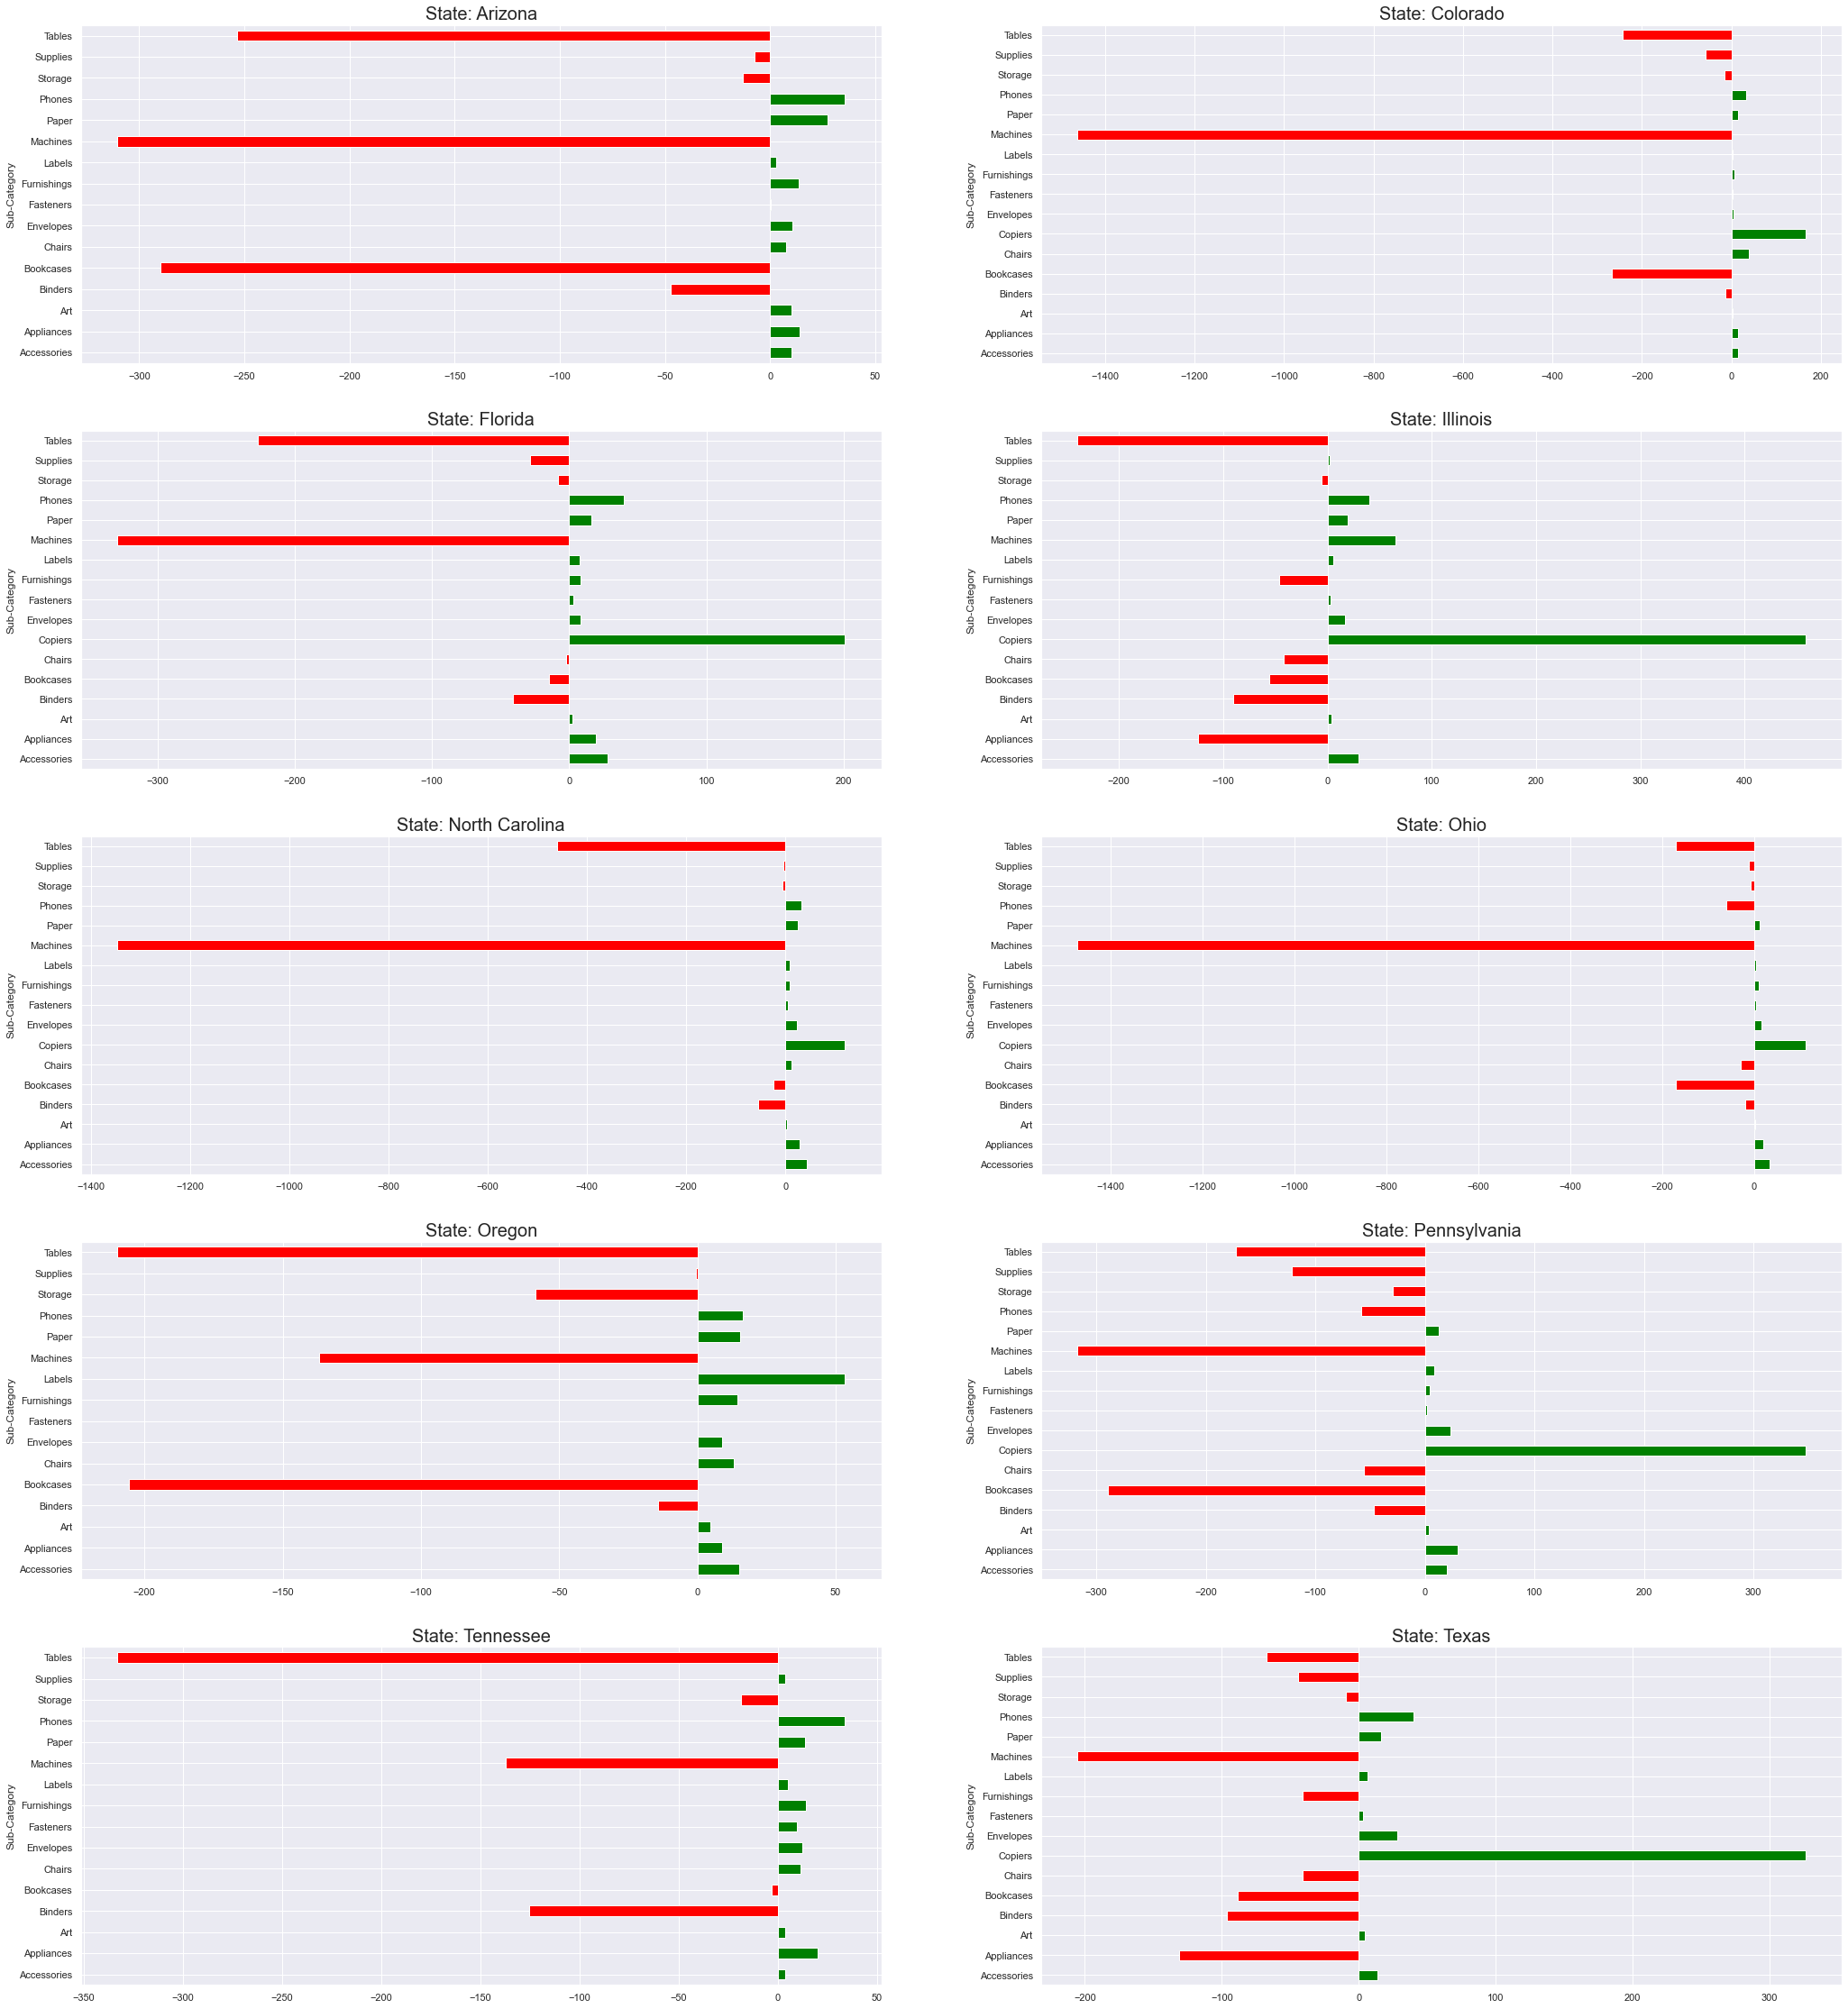

In [90]:
fig,axes = plt.subplots(5,2,figsize=(35,40))
#plt.title = "Non Profit Making States Vs average Profit of sub-categories"

l = loss_city.tolist()
for i in range(5):
    for j in range(2):
        d = data[data['State']==l[2*i+j]].groupby('Sub-Category').mean()['Profit']#.plot.barh(ax= axes[i][j])
        c = d.map(lambda x: 'green' if(x > 0) else 'red')
        d.plot.barh(color=c, ax=axes[i,j],title="State: "+l[2*i+j])
        axes[i,j].title.set_size(20)


### The avobe graph is plotted sub-categories against mean profit for the cities where margin of loss is higher

# Colclusions:
### 1. Products of Sub-Category "Machines","Tables" and "BookCases" are not profitable.
### 2. The super store is facing loss in the following states:
#### Arizona','Colorado','Florida','Illinois','North Carolina','Ohio','Oregon','Pennsylvania','Tennessee','Texas' 
### 3. The Discount margin is quite large in the above mentioned states
### 4. Vemont is the most profitable state.

